# Capítulo 2: Conceptos Básicos de las series de tiempo
En este Notebook, vamos a incorporar algunos algoritmos y metodologías para definir (y empezar a analizar) algunas series de tiempo. Algunas de estas metodologías o métodos, o algoritmos buscan entender y caracterizar las series de tiempo de las que vamos a estudiar.

## Generación de la figura de serie de tiempo de sunsport number

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [10]:
suns=pd.read_csv("../datas/SN_d_tot_V2.0.csv",header=None,delimiter=";",
                 names=["Year","Month","Day","DecimalYear","Daily total sunspot number","Daily standard deviation",
                       "Number of observations","Definitive/provisional indicator"])
suns.index=suns["DecimalYear"]

In [11]:
suns.head()

,Year,Month,Day,DecimalYear,Daily total sunspot number,Daily standard deviation,Number of observations,Definitive/provisional indicator
DecimalYear,,,,,,,,
1818.001,1818,1,1,1818.001,-1,-1.0,0,1
1818.004,1818,1,2,1818.004,-1,-1.0,0,1
1818.007,1818,1,3,1818.007,-1,-1.0,0,1
1818.010,1818,1,4,1818.010,-1,-1.0,0,1
1818.012,1818,1,5,1818.012,-1,-1.0,0,1


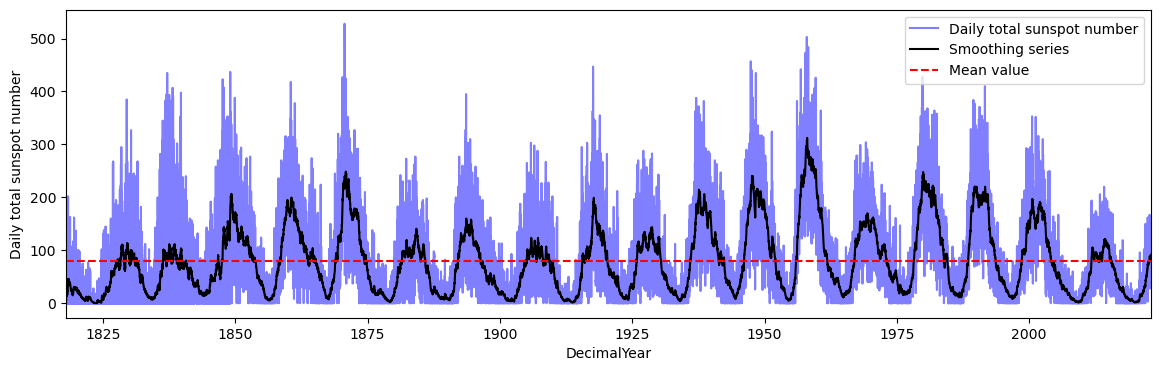

In [12]:
suns["Daily total sunspot number"].plot(figsize=(14,4),color="blue",alpha=0.5,label="Daily total sunspot number")
suns["Daily total sunspot number"].ewm(alpha=0.01).mean().plot(figsize=(14,4),color="k",label="Smoothing series")
plt.hlines(suns["Daily total sunspot number"].mean(),suns.Year.min(),suns.Year.max(),linestyle="--",color="red",label="Mean value")
plt.xlim(suns.Year.min(),suns.Year.max()); plt.legend(); plt.ylabel("Daily total sunspot number")
plt.savefig("sunspot.pdf",dpi=250,bbox_inches="tight")
plt.show()

## Componentes de una serie de tiempo

Las distintas razones o fuerzas que afectan a los valores de una observación en una serie temporal son los componentes de una serie temporal. Las cuatro categorías de componentes de las series temporales son
- Tendencia
- Variaciones estacionales
- Variaciones cíclicas
- Movimientos aleatorios o irregulares
- 
Las Variaciones Estacionales y Cíclicas son los cambios periódicos o fluctuaciones a corto plazo.

### Tendencia
La tendencia muestra la tendencia general de los datos a aumentar o disminuir durante un largo periodo de tiempo. Una tendencia es una tendencia media suave, general y a largo plazo. No siempre es necesario que el aumento o la disminución se produzcan en la misma dirección durante todo el periodo de tiempo.

Es observable que las tendencias pueden aumentar, disminuir o mantenerse estables en distintos tramos de tiempo.  Pero la tendencia general debe ser ascendente, descendente o estable. La población, la producción agrícola, los artículos manufacturados, el número de nacimientos y defunciones, el número de industrias o cualquier fábrica, el número de escuelas o colegios son algunos de sus ejemplos que muestran algún tipo de tendencia de movimiento.

#### Tendencia lineal y no lineal
Si trazamos los valores de las series temporales en un gráfico de acuerdo con el tiempo t. El patrón de agrupación de los datos muestra el tipo de tendencia. Si el conjunto de datos se agrupa más o menos alrededor de una línea recta, entonces la tendencia es lineal, de lo contrario es no lineal (Curvilínea).

### Fluctuaciones periódicas
En una serie temporal hay algunos componentes que tienden a repetirse durante un cierto periodo de tiempo. Actúan de forma periódica y espasmódica.

### Variaciones estacionales
Son las fuerzas rítmicas que actúan de forma regular y periódica en un periodo inferior a un año. Tienen el mismo o casi el mismo patrón durante un periodo de 12 meses. Esta variación estará presente en una serie temporal si los datos se registran cada hora, cada día, cada semana, cada trimestre o cada mes.

Estas variaciones se deben a fuerzas naturales o a convenciones artificiales. Las distintas estaciones o condiciones climáticas desempeñan un papel importante en las variaciones estacionales. Por ejemplo, la producción de cultivos depende de las estaciones, la venta de paraguas e impermeables en la estación lluviosa y la venta de ventiladores eléctricos y aire acondicionado se dispara en verano.

El efecto de las convenciones creadas por el hombre, como algunos festivales, costumbres, hábitos, modas y algunas ocasiones como el matrimonio, es fácilmente perceptible.  Se repiten año tras año. Un repunte en una temporada no debe tomarse como indicador de mejores condiciones comerciales.

### Variaciones cíclicas
Las variaciones de una serie temporal que se repiten durante más de un año son las variaciones cíclicas. Este movimiento oscilatorio tiene un periodo de oscilación superior a un año. Un periodo completo es un ciclo. Este movimiento cíclico se denomina a veces "ciclo económico".

Es un ciclo de cuatro fases que comprende las fases de prosperidad, recesión, depresión y recuperación. La variación cíclica puede ser regular pero no periódica. Los altibajos en los negocios dependen de la naturaleza conjunta de las fuerzas económicas y de la interacción entre ellas.

### Movimientos aleatorios o irregulares
Existe otro factor que provoca la variación de la variable objeto de estudio. No son variaciones regulares y son puramente aleatorias o irregulares. Estas fluctuaciones son imprevistas, incontrolables, imprevisibles y erráticas. Estas fuerzas son los terremotos, las guerras, las inundaciones, las hambrunas y cualquier otra catástrofe.

![fig](Everythinginsinglepicture_2.jpg)

### Tendencia

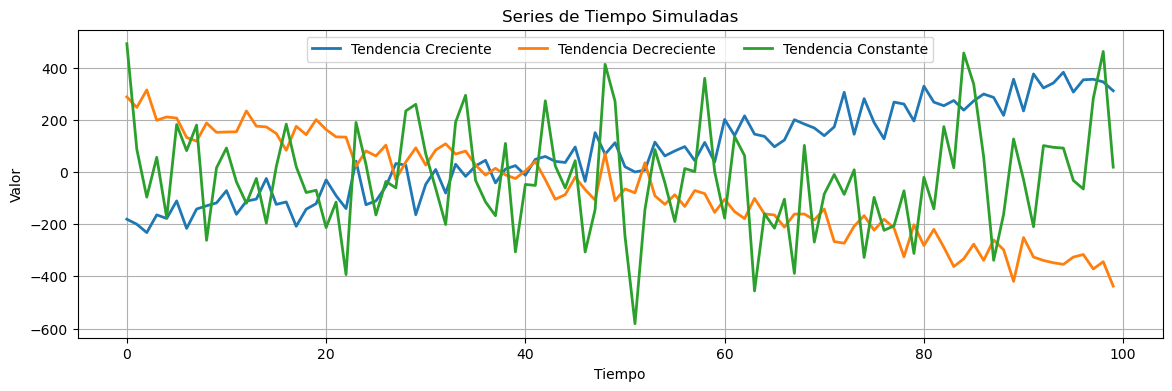

In [13]:
## Simulando datos
# Configuración de la serie de tiempo
n = 100  # Número de puntos de datos
t = np.arange(n)  # Índices de tiempo

# Serie de tiempo con tendencia creciente
tendencia_creciente=5.5*t-200+np.random.normal(0,50,n)
# Serie de tiempo con tendencia decreciente
tendencia_decreciente=-6.5*t+250+np.random.normal(0,50,n)
# Serie de tiempo con tendencia relativamente constante
tendencia_constante=np.random.normal(0,200,n)

# Visualización de las series de tiempo
plt.figure(figsize=(14, 4))
plt.plot(t, tendencia_creciente, label='Tendencia Creciente', lw=2)
plt.plot(t, tendencia_decreciente, label='Tendencia Decreciente', lw=2)
plt.plot(t, tendencia_constante, label='Tendencia Constante', lw=2)
plt.legend(ncol=3); plt.title('Series de Tiempo Simuladas'); plt.xlabel('Tiempo'); plt.ylabel('Valor'); plt.grid(True)
plt.savefig("tendencia.pdf",dpi=250,bbox_inches="tight")
plt.show()

In [14]:
## Otro ejemplo con datos simulados
sim1_train=pd.read_csv("../datas/simuateddata1_train.csv")
sim1_train.index=pd.to_datetime(sim1_train.Date)
del sim1_train["Date"]
sim1_train=sim1_train[sim1_train.index>="2010"].resample("W").mean()

In [15]:
sim1_train.head()

,store,product,number_sold
Date,,,
2010-01-03,3.0,4.5,784.252381
2010-01-10,3.0,4.5,783.330612
2010-01-17,3.0,4.5,782.912245
2010-01-24,3.0,4.5,781.585714
2010-01-31,3.0,4.5,782.191837


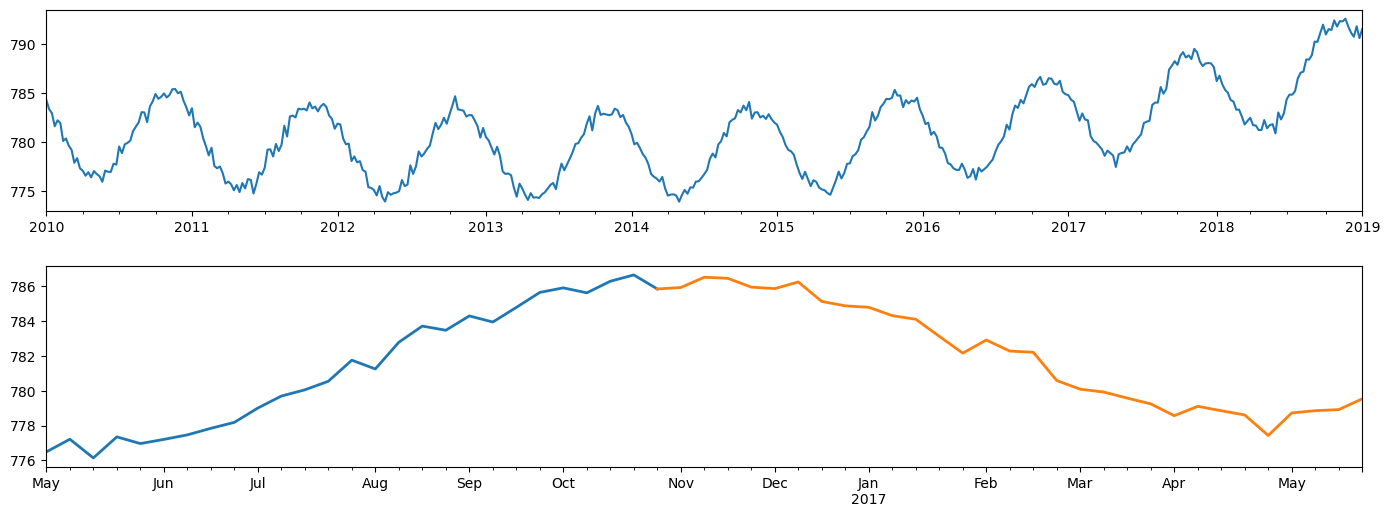

In [16]:
plt.figure(figsize=(14,10))
plt.subplot(411)
sim1_train["number_sold"].plot()
plt.xlabel("")
plt.subplot(412)
sim1_train[(sim1_train.index>="2016-05-01")&(sim1_train.index<="2016-10-30")]["number_sold"].plot(lw=2)
plt.xlabel("")
plt.subplot(412)
sim1_train[(sim1_train.index>="2016-10-30")&(sim1_train.index<="2017-05-30")]["number_sold"].plot(lw=2)
plt.xlabel("")
plt.savefig("tendencia2.pdf",dpi=250,bbox_inches="tight")
plt.tight_layout()

## Descomposición automática de series temporales
Existen métodos para descomponer automáticamente una serie temporal.

La biblioteca statsmodels proporciona una implementación del método de descomposición ingenuo, o clásico, en una función llamada seasonal_decompose(). Requiere que se especifique si el modelo es aditivo o multiplicativo.

Ambos producirán un resultado y debe tener cuidado de ser crítico al interpretar el resultado. Una revisión de un gráfico de la serie temporal y algunos estadísticos de resumen pueden ser a menudo un buen comienzo para hacerse una idea de si su problema de series temporales parece aditivo o multiplicativo.

La función seasonal_decompose() devuelve un objeto resultado. El objeto resultante contiene matrices para acceder a cuatro datos de la descomposición.

Por ejemplo, el siguiente fragmento muestra cómo descomponer una serie en componentes de tendencia, estacionales y residuales suponiendo un modelo aditivo.

El objeto resultante proporciona acceso a las series de tendencia y estacional como matrices. También proporciona acceso a los residuos, que son las series temporales una vez eliminados los componentes de tendencia y estacionales. Por último, también se almacenan los datos originales u observados.

### Descomposición aditiva
Podemos crear una serie temporal compuesta por una tendencia lineal creciente de 1 a 99 y algo de ruido aleatorio y descomponerla como un modelo aditivo.

Dado que la serie temporal es artificial y se proporciona como un array de números, debemos especificar la frecuencia de las observaciones (el argumento period=1). Si se proporciona un objeto Pandas Series, este argumento no es necesario.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
result1 = seasonal_decompose(sim1_train["number_sold"], model='additive', period=1)

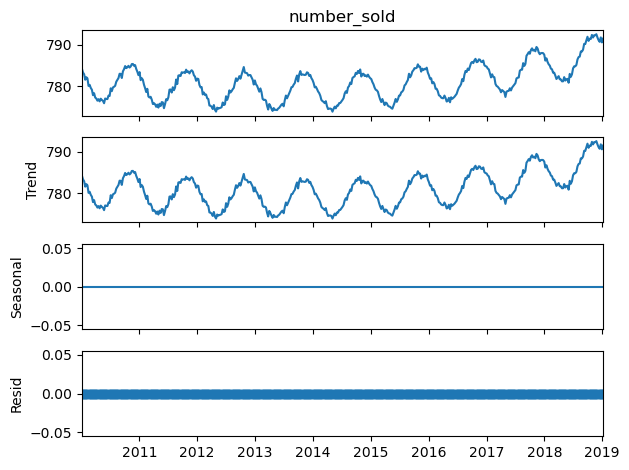

In [18]:
result1.plot()
plt.savefig("descomposicion1.pdf",dpi=250,bbox_inches="tight")
plt.show()

### Descomposición multiplicativa
Podemos concebir una serie temporal cuadrática como un cuadrado del paso temporal de 1 a 99, y luego descomponerla asumiendo un modelo multiplicativo.

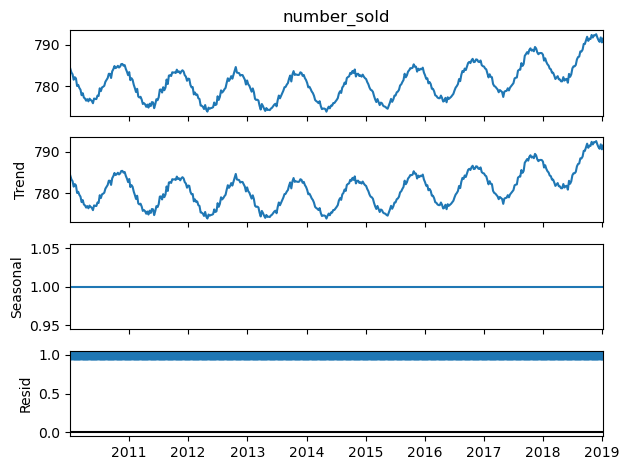

In [19]:
result2 = seasonal_decompose(sim1_train["number_sold"], model='multiplicative', period=1)
result2.plot()
plt.savefig("descomposicion2.pdf",dpi=250,bbox_inches="tight")
plt.show()

## Ejemplo: Pasajeros de líneas aéreas
El conjunto de datos Pasajeros de líneas aéreas describe el número total de pasajeros de líneas aéreas durante un periodo de tiempo.

Las unidades son un recuento del número de pasajeros de líneas aéreas en miles. Hay 144 observaciones mensuales de 1949 a 1960.

Descargar el conjunto de datos -> https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv.
Descargue el conjunto de datos a su directorio de trabajo actual con el nombre de archivo "airline-passengers.csv".

En primer lugar, vamos a representar gráficamente las observaciones en bruto.

In [26]:
passengers = pd.read_csv('../datas/airline-passengers.csv', header=0, index_col=0, parse_dates=True)
passengers

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


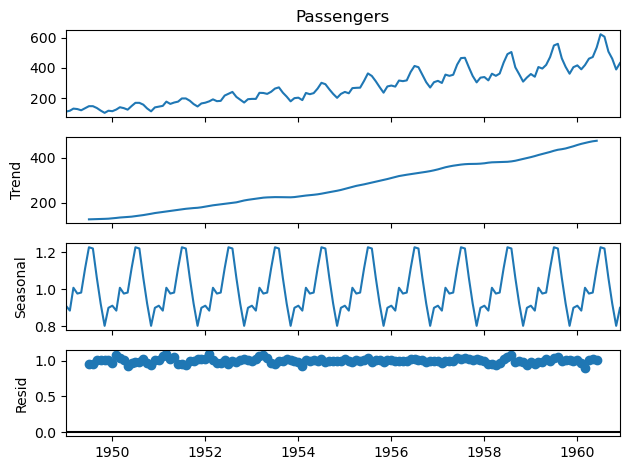

In [21]:
result_p = seasonal_decompose(passengers["Passengers"], model='multiplicative')
result_p.plot()
plt.savefig("descomposicion_passenger.pdf",dpi=250,bbox_inches="tight")
plt.show()

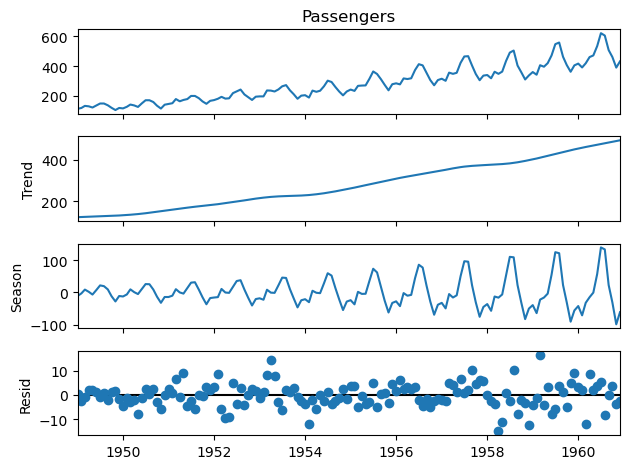

In [22]:
result_p2 = STL(passengers["Passengers"])
result_p2.fit().plot()
plt.savefig("descomposicion_passenger2.pdf",dpi=250,bbox_inches="tight")

## Algunos tipos de visualizaciones

/tmp/ipykernel_234591/2369086669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=suns[suns["Year"]>=2020], x='Month', y="Daily total sunspot number", palette="Paired")
/tmp/ipykernel_234591/2369086669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=suns[suns["Year"]>=2020], x='Year', y="Daily total sunspot number", palette="Paired")


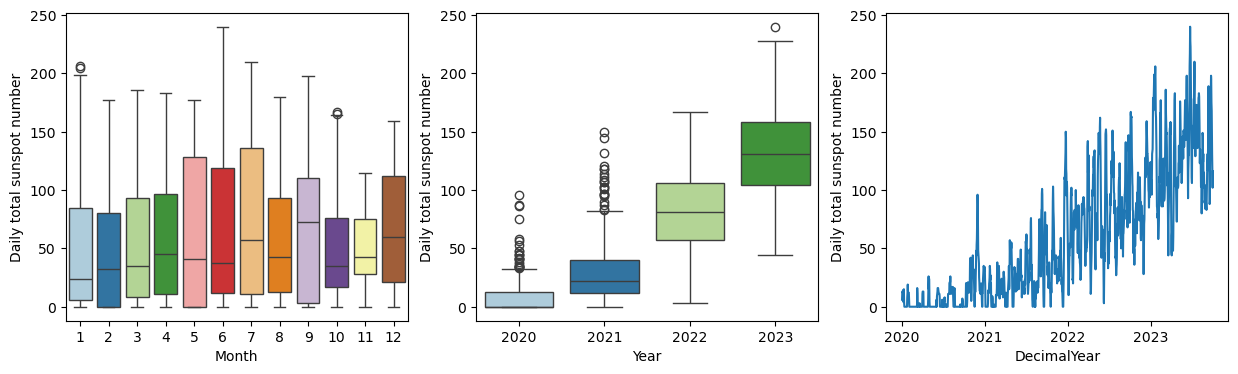

In [23]:
import seaborn as sns
# Por ejemplo usando la serie de datos de sunspot
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.boxplot(data=suns[suns["Year"]>=2020], x='Month', y="Daily total sunspot number", palette="Paired")
plt.subplot(132)
sns.boxplot(data=suns[suns["Year"]>=2020], x='Year', y="Daily total sunspot number", palette="Paired")
plt.subplot(133)
sns.lineplot(data=suns[suns["Year"]>=2020], x='DecimalYear', y="Daily total sunspot number")
plt.savefig("someplots.pdf",dpi=250,bbox_inches="tight")
plt.show()

In [29]:
passengers["Year"]=passengers.index.year
passengers["Month"]=passengers.index.month
passengers["Day"]=passengers.index.day

In [30]:
passengers

,Passengers,Year,Month,Day
Month,,,,
1949-01-01,112,1949,1,1
1949-02-01,118,1949,2,1
1949-03-01,132,1949,3,1
1949-04-01,129,1949,4,1
1949-05-01,121,1949,5,1
...,...,...,...,...
1960-08-01,606,1960,8,1
1960-09-01,508,1960,9,1
1960-10-01,461,1960,10,1


/tmp/ipykernel_234591/328307954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=passengers, x='Month', y="Passengers", palette="Paired")
/tmp/ipykernel_234591/328307954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=passengers, x='Year', y="Passengers", palette="Paired")
/tmp/ipykernel_234591/328307954.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=passengers, x='Day', y="Passengers", palette="Paired")


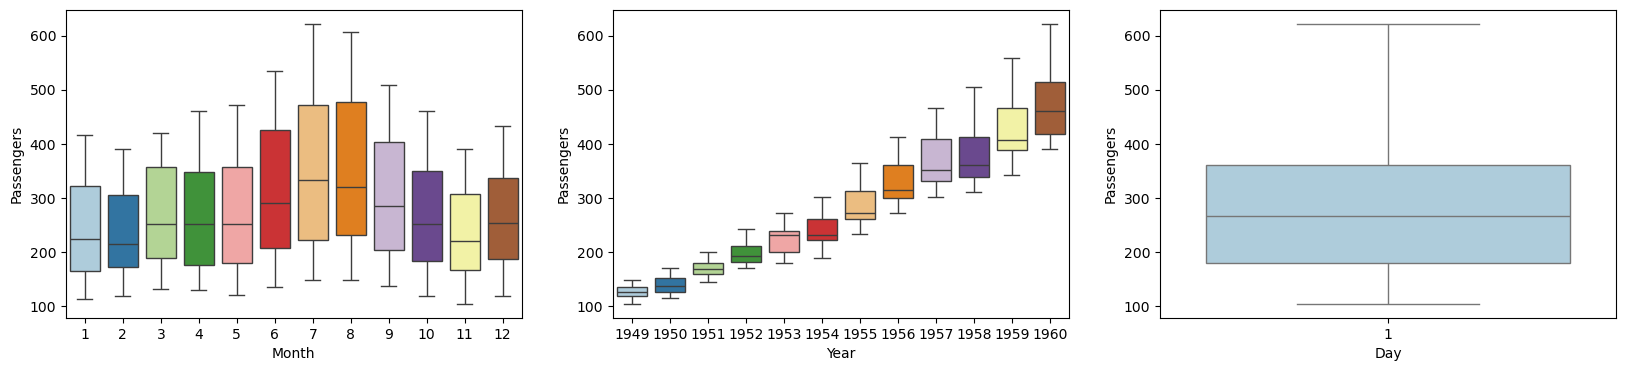

In [33]:
# Por ejemplo usando la serie de datos de sunspot
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.boxplot(data=passengers, x='Month', y="Passengers", palette="Paired")
plt.subplot(132)
sns.boxplot(data=passengers, x='Year', y="Passengers", palette="Paired")
plt.subplot(133)
sns.boxplot(data=passengers, x='Day', y="Passengers", palette="Paired")
plt.savefig("someplots2.pdf",dpi=250,bbox_inches="tight")
plt.show()

## Chequeando estacionariedad

In [34]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#You can use the statsmodels library in Python to perform the Dickey-Fuller test for checking stationarity in a time series. 
#Here's a simple code example to do that:
def dickey_fuller_test(time_series):
    # Perform the Dickey-Fuller test
    result = adfuller(time_series)
    # Extract the test results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'{key}: {value}')
    # Interpret the results
    if p_value <= 0.05:
        print("The time series is stationary (reject the null hypothesis)")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis)")
    return

In [35]:
dickey_fuller_test(suns["Daily total sunspot number"])

ADF Statistic: -7.982923200466908
p-value: 2.5943138165489973e-12
Critical Values:
1%: -3.4304370961000616
5%: -2.8615784949709298
10%: -2.5667904895505225
The time series is stationary (reject the null hypothesis)


In [36]:
dickey_fuller_test(passengers["Passengers"])

ADF Statistic: 0.8153688792060528
p-value: 0.9918802434376411
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598
The time series is non-stationary (fail to reject the null hypothesis)


## Chequeando auto-correlacion y lagtime

In [37]:
#To calculate auto-correlation and time lag for a time series, you can use the pandas library in Python. 
#Here's a function that does just that:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
def plot_autocorrelation(time_series, alpha=0.05):
    """
    Calculate and plot autocorrelation for a time series.
    """
    n = len(time_series)
    max_lag = n // 2
    # Plot the autocorrelation using statsmodels' plot_acf
    # Plot the autocorrelation using statsmodels' plot_acf
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_acf(time_series, alpha=alpha, ax=ax)
    plt.title('Autocorrelation Plot with Confidence Interval')
    plt.grid(True)
    plt.show()
    # Calculate the autocorrelation
    acf_result, _ = acf(time_series, nlags=len(time_series)-1, fft=False, alpha=alpha)
    # Find the lags with the highest autocorrelation
    max_autocorrelation = max(abs(acf_result))
    max_autocorrelation_lags = [i for i, autocorr in enumerate(acf_result) if abs(autocorr) == max_autocorrelation]
    print(f"Lags with the highest autocorrelation: {max_autocorrelation_lags}")
    return acf_result

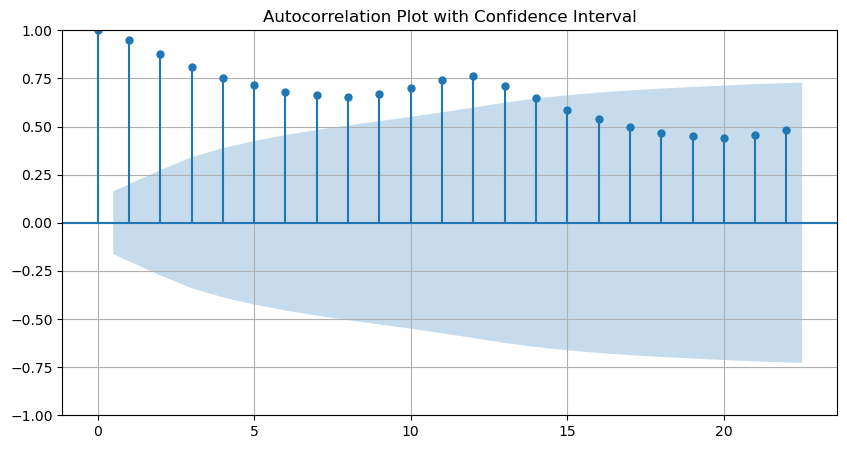

Lags with the highest autocorrelation: [0]


In [38]:
passenger_ac=plot_autocorrelation(passengers["Passengers"])

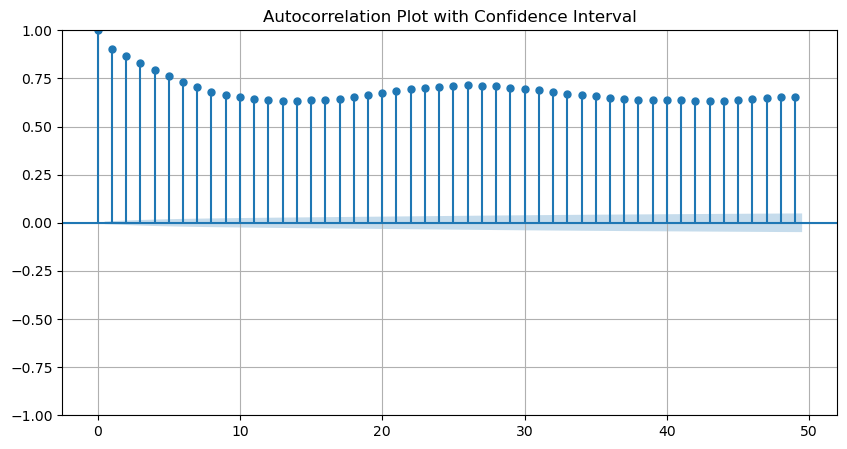

Lags with the highest autocorrelation: [0]


In [39]:
sunspot_ac=plot_autocorrelation(suns["Daily total sunspot number"])

## Suavizados de series de tiempo

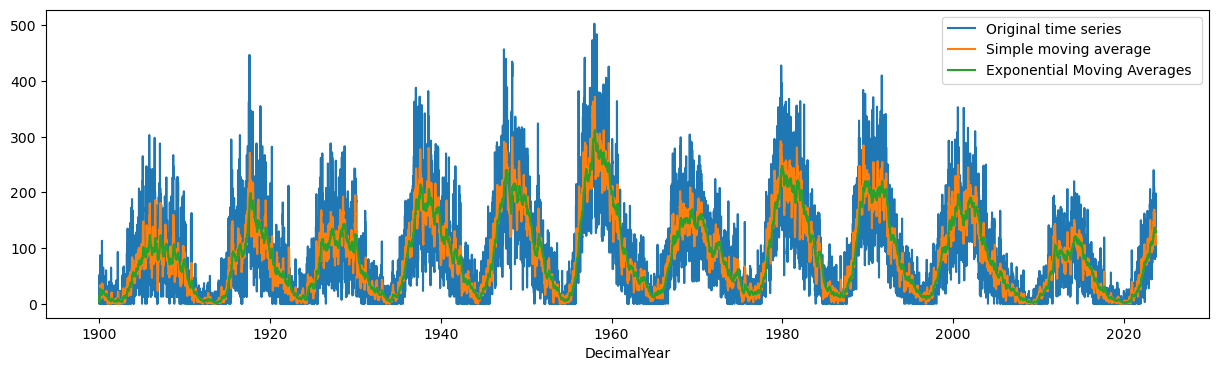

In [40]:
plt.figure(figsize=(15,4))
suns[suns["Year"]>=1900]["Daily total sunspot number"].plot(label="Original time series")
# calculating simple moving average
suns[suns["Year"]>=1900]["Daily total sunspot number"].rolling(30).mean().plot(label="Simple moving average")
#Exponential Moving Averages 
suns[suns["Year"]>=1900]["Daily total sunspot number"].ewm(alpha=0.01).mean().plot(label="Exponential Moving Averages ")
plt.legend()
plt.savefig("smothing.pdf",dpi=250,bbox_inches="tight")
plt.show()